In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/sonar/Downloads/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
df_converted = pd.get_dummies(df)
df_converted.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
df_filled=df_converted.fillna(0)
X=df_filled.drop(['SalePrice'],1)
Y = df_filled['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_test.head()

1357    161000
2367    116000
2822    196500
2126    123600
1544    126000
Name: SalePrice, dtype: int64

In [13]:
def getDummy(df):
    df=pd.get_dummies(df)
    return df
# One Hot Encoding
X_train=getDummy(X_train)
X_test=getDummy(X_test)
X_test.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
1357,1358,903427090,70,0.0,5100,8,7,1925,1996,0.0,...,0,0,0,1,0,0,0,0,1,0
2367,2368,527450460,160,21.0,1890,6,7,1972,1972,380.0,...,0,0,0,1,0,0,0,0,1,0
2822,2823,908128100,60,62.0,7162,7,5,2003,2004,190.0,...,0,0,0,1,0,0,0,0,1,0
2126,2127,907135180,20,60.0,8070,4,5,1994,1995,0.0,...,0,0,0,1,0,0,0,0,1,0
1544,1545,910200080,30,50.0,7000,6,8,1926,1998,0.0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
# Decision Tree
score = []
for i in range(1,20):
    dt = DecisionTreeRegressor(max_depth=i)
    # Using cross val to determine depth of tree
    score += [np.mean(cross_val_score(dt, X_train.iloc[:,:-1], Y_train))]

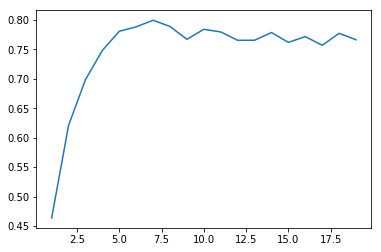

In [20]:
plt.plot(range(1,20),score)
plt.show()

In [21]:
#train the model on the whole training set
dtr = DecisionTreeRegressor(max_depth=3)
model_dtr = dtr.fit(X_train.iloc[:,:-1], Y_train)
np.mean(cross_val_score(dt, X_train.iloc[:,:-1], Y_train))

0.74275558970612521

In [27]:
#predict on the test set
X_test.index = range(len(X_test))
pred_test = model_dtr.predict(X_test.iloc[:,:-1])
#calculate the R squared on test set
Y_test.index = range(len(Y_test))

print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, pred_test))
# The mean square error
print("Mean squared error: %.2f"
      % r2_score(pred_test, Y_test))

Mean squared error: 1939023367.97
Mean squared error: 0.62
